<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/CNN/TOP%20Projects/MNIST%20Classification/Classifying_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing datasets and Lib

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd

In [2]:
mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


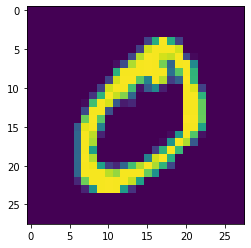

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])

In [5]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
y_train[0]

5

preprocessing the datasets

In [6]:
def preprocess_img(img):
  img=img.reshape(-1,28,28,1)
  img=img/255.0

  return img

In [7]:
x_train=preprocess_img(x_train)
x_test=preprocess_img(x_test)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


Model preparation

In [9]:
from tensorflow.keras import layers
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 1,394,122
Trainable params: 1,394,122
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.0518 - val_accuracy: 0.9830
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0468 - val_accuracy: 0.9846
Epoch 3/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0477 - val_accuracy: 0.9839
Epoch 4/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0464 - val_accuracy: 0.9853
Epoch 5/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0465 - val_accuracy: 0.9844
Epoch 6/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0496 - val_accuracy: 0.9862
Epoch 7/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0083 - accuracy: 0.9970 - val_loss: 0.0466 - val_accuracy:

In [21]:
y_pred=model.predict_classes(x_test)

In [22]:
y_pred_final=np.argmax(y_pred,axis=-1)

In [27]:
y_pred.shape

(10000, 10)

In [26]:
y_pred[0]

array([1.6360878e-11, 2.1864812e-11, 1.9708363e-10, 7.7453313e-12,
       2.7085010e-11, 3.1019875e-13, 1.0213535e-17, 1.0000000e+00,
       3.7966043e-14, 1.4741313e-12], dtype=float32)

In [24]:
y_pred_final

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

length=range(10) # Epochs

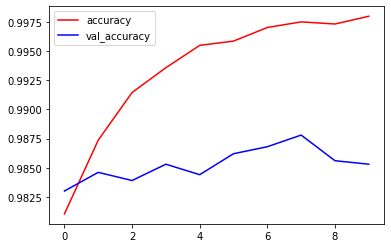

In [45]:
import matplotlib.pyplot as plt

plt.plot(length,acc,color='red',label='accuracy')
plt.plot(length,val_acc,color='blue',label='val_accuracy')
plt.legend()

plt.show()

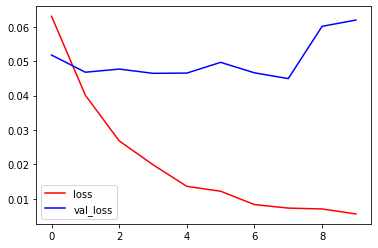

In [46]:
import matplotlib.pyplot as plt

plt.plot(length,loss,color='red',label='loss')
plt.plot(length,val_loss,color='blue',label='val_loss')
plt.legend()

plt.show()